In [2]:
import pandas as pd
avocado = pd.read_csv('avocado.csv')

In [3]:
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
price_Volume = avocado[["AveragePrice","Total Volume"]]

In [5]:
price_Volume

,AveragePrice,Total Volume
0,1.33,64236.62
1,1.35,54876.98
2,0.93,118220.22
3,1.08,78992.15
4,1.28,51039.60
...,...,...
18244,1.63,17074.83
18245,1.71,13888.04
18246,1.87,13766.76
18247,1.93,16205.22


In [6]:
x = price_Volume.iloc[:,:-1].values

In [7]:
y = price_Volume.iloc[:,1].values

In [8]:
twoVar = price_Volume.iloc[:,:].values

In [9]:
twoVar

array([[1.3300000e+00, 6.4236620e+04],
       [1.3500000e+00, 5.4876980e+04],
       [9.3000000e-01, 1.1822022e+05],
       ...,
       [1.8700000e+00, 1.3766760e+04],
       [1.9300000e+00, 1.6205220e+04],
       [1.6200000e+00, 1.7489580e+04]])

In [10]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [11]:
from sklearn import linear_model
linearModel = linear_model.LinearRegression().fit(xTrain,yTrain)

In [12]:
linearModel.coef_

array([-1679333.94199651])

In [13]:
linearModel.intercept_

3217961.5269852

In [14]:
linearYP = linearModel.predict(xTest)

In [15]:
from sklearn.metrics import mean_squared_error
linearMSE = mean_squared_error(yTest,linearYP)
linearMSE

11580803297878.777

### Linear MSE 11580803297878.777

In [16]:
ridgeModel = linear_model.Ridge(alpha = .5).fit(xTrain,yTrain)

In [17]:
ridgeModel.coef_

array([-1678929.48649987])

In [18]:
ridgeModel.intercept_

3217393.105850799

In [19]:
ridgeYP = ridgeModel.predict(xTest)

In [20]:
ridgeMSE = mean_squared_error(yTest,ridgeYP)
ridgeMSE

11580791881181.734

### Ridge MSE 11579947680883.408

In [21]:
lassoModel = linear_model.Lasso(alpha = 0.1).fit(xTrain,yTrain)

In [22]:
lassoModel.coef_

array([-1679333.32654309])

In [23]:
lassoYP = lassoModel.predict(xTest)

In [24]:
lassoMSE = mean_squared_error(yTest,lassoYP)
lassoMSE

11580803280466.072

### Lasso MSE 11579953208556.69

In [25]:
data = {'Linear Regression' : linearMSE, 'Ridge Regression' : ridgeMSE, 'Lasso Regression' : lassoMSE}
min(data, key = data.get)

'Ridge Regression'

In [26]:
import numpy as np
medianYTrain = np.median(yTrain)
yTrain = np.where(yTrain > medianYTrain, 1,0)

In [27]:
from sklearn import svm

In [28]:
svcModel = svm.SVC(kernel='sigmoid')
svcModel.fit(xTrain,yTrain)

SVC(kernel='sigmoid')

In [29]:
svcYP = svcModel.predict(xTest)

In [30]:
from sklearn.metrics import accuracy_score, precision_score
yTest = np.where(yTest > medianYTrain, 1,0)
svcAccu = accuracy_score(yTest, svcYP)
svcAccu

0.4469406392694064

### SVC Accuracy 0.9421004566210046

In [31]:
svcPres = precision_score(yTest,svcYP)
svcPres

0.4668476153547887

In [32]:
from sklearn import tree

In [33]:
treeModel = tree.DecisionTreeClassifier(criterion='entropy')
treeModel = treeModel.fit(xTrain, yTrain)

In [34]:
treeYP = treeModel.predict(xTest)

In [35]:
treeAccu = accuracy_score(yTest,treeYP)
treeAccu

0.7442922374429224

### Tree Accuracy 0.47963470319634705

In [36]:
treePres = precision_score(yTest,treeYP)
treePres

0.7448591012947449

### 6/17/22 Research Lab Code 

In [37]:
from sklearn.cluster import KMeans

In [38]:
import numpy as np

In [39]:
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(price_Volume)

In [40]:
np.mean(kmeans.labels_)

0.9907392185873198

In [41]:
import matplotlib.pyplot as plt

In [42]:
label = kmeans.fit_predict(twoVar)

In [43]:
label0 = twoVar[label == 0]

In [44]:
label0

array([[9.50000000e-01, 2.72979837e+07],
       [9.80000000e-01, 2.50836472e+07],
       [9.30000000e-01, 2.80413354e+07],
       [8.90000000e-01, 2.88003966e+07],
       [9.90000000e-01, 2.26179994e+07],
       [9.60000000e-01, 2.51142281e+07],
       [9.20000000e-01, 2.85977563e+07],
       [9.70000000e-01, 2.84857160e+07],
       [9.70000000e-01, 3.10474843e+07],
       [1.04000000e+00, 2.62400721e+07],
       [9.90000000e-01, 2.93751236e+07],
       [1.00000000e+00, 2.92161981e+07],
       [1.02000000e+00, 2.82435055e+07],
       [1.03000000e+00, 2.77535081e+07],
       [1.02000000e+00, 2.95690866e+07],
       [1.03000000e+00, 3.12458356e+07],
       [1.02000000e+00, 3.35264801e+07],
       [1.07000000e+00, 2.97616385e+07],
       [1.08000000e+00, 2.96998456e+07],
       [1.05000000e+00, 3.19368562e+07],
       [1.05000000e+00, 3.32549119e+07],
       [1.09000000e+00, 3.03584679e+07],
       [1.07000000e+00, 3.06522111e+07],
       [1.07000000e+00, 3.23246477e+07],
       [1.070000

In [45]:
label1 = twoVar[label ==1]

In [46]:
np.shape(label1)

(18080, 2)

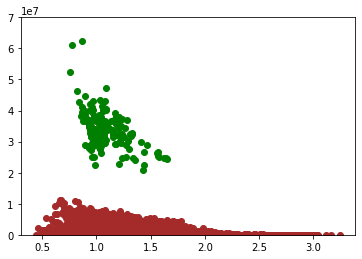

In [47]:
plt.scatter(label0[:,0],label0[:,1],color = 'green')
plt.scatter(label1[:,0],label1[:,1],color = 'brown')
plt.ylim([0,70000000])
plt.show()

In [48]:
from sklearn.cluster import AgglomerativeClustering

In [49]:
hClustering = AgglomerativeClustering().fit(twoVar)

In [50]:
np.mean(hClustering.labels_)

0.009260781412680146

In [51]:
hLabel = hClustering.fit_predict(twoVar)

In [52]:
hLabel0 = twoVar[hLabel == 0]
hLabel1 = twoVar[hLabel == 1]

Text(0.5, 0, 'Number of points in node (or index of point if no parenthesis).')

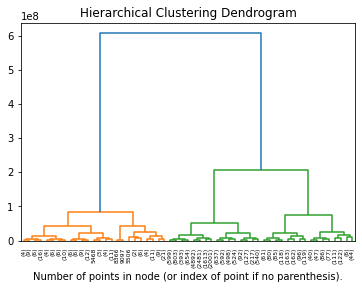

In [53]:

from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

hClustering = AgglomerativeClustering(distance_threshold=0,n_clusters=None).fit(twoVar)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(hClustering, truncate_mode="level", p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

In [54]:
from sklearn.cluster import DBSCAN

In [55]:
from sklearn.preprocessing import Normalizer

In [56]:
twoVar[:,1] = (twoVar[:,1]-np.mean(twoVar[:,1]))/np.std(twoVar[:,1])

In [57]:
DBClustering = DBSCAN(eps =2, min_samples = 4).fit(twoVar)

In [58]:
DBLabel = DBClustering.fit_predict(twoVar)

In [59]:
DBLabel0 = twoVar[DBLabel == 0]
DBLabel1 = twoVar[DBLabel == 1]

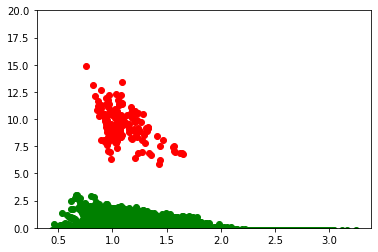

In [60]:
plt.scatter(DBLabel0[:,0],DBLabel0[:,1],color = 'green')
plt.scatter(DBLabel1[:,0],DBLabel1[:,1],color = 'red')
plt.ylim([0,20])
plt.show()